In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [16]:
from  ydata_profiling import ProfileReport

In [68]:
df = pd.read_csv(r"C:\Users\kiran\Downloads\laptop_pricing_dataset_mod1.csv")

In [11]:
df.drop('Unnamed: 0',axis=1,inplace=True)

In [12]:
df.columns

Index(['Manufacturer', 'Category', 'Screen', 'GPU', 'OS', 'CPU_core',
       'Screen_Size_cm', 'CPU_frequency', 'RAM_GB', 'Storage_GB_SSD',
       'Weight_kg', 'Price'],
      dtype='object')

In [ ]:
profile =ProfileReport(df)
profile.to_file("E:\Reports_Project\laptop_report.html")

In [19]:
df.head()

,Manufacturer,Category,Screen,GPU,OS,CPU_core,Screen_Size_cm,CPU_frequency,RAM_GB,Storage_GB_SSD,Weight_kg,Price
0,Acer,4,IPS Panel,2,1,5,35.560,1.6,8,256,1.60,978
1,Dell,3,Full HD,1,1,3,39.624,2.0,4,256,2.20,634
2,Dell,3,Full HD,1,1,7,39.624,2.7,8,256,2.20,946
3,Dell,4,IPS Panel,2,1,5,33.782,1.6,8,128,1.22,1244
4,HP,4,Full HD,2,1,7,39.624,1.8,8,256,1.91,837


In [20]:
df.Manufacturer.value_counts()

Manufacturer
Dell       71
Lenovo     52
HP         49
Acer       19
Asus       18
Toshiba    17
Samsung     5
MSI         4
Huawei      1
Razer       1
Xiaomi      1
Name: count, dtype: int64

In [35]:
for column in df.columns:
    print(df[column].value_counts())
    
    print("_____________________________")

Manufacturer
Dell       71
Lenovo     52
HP         49
Acer       19
Asus       18
Toshiba    17
Samsung     5
MSI         4
Huawei      1
Razer       1
Xiaomi      1
Name: count, dtype: int64
_____________________________
Category
3    154
4     60
1     14
5      9
2      1
Name: count, dtype: int64
_____________________________
Screen
Full HD      161
IPS Panel     77
Name: count, dtype: int64
_____________________________
GPU
2    136
3     69
1     33
Name: count, dtype: int64
_____________________________
OS
1    224
2     14
Name: count, dtype: int64
_____________________________
CPU_core
5    123
7     95
3     20
Name: count, dtype: int64
_____________________________
Screen_Size_cm
39.624    89
35.560    64
38.100    23
33.782    20
33.020    18
43.942     7
43.180     5
31.750     4
30.480     4
Name: count, dtype: int64
_____________________________
CPU_frequency
2.5    71
2.7    43
1.6    30
2.8    25
1.8    23
2.6    11
2.3    11
2.4    10
2.0     9
2.9     4
1.2     1
Na

In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 238 entries, 0 to 237
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Manufacturer    238 non-null    object 
 1   Category        238 non-null    int64  
 2   Screen          238 non-null    object 
 3   GPU             238 non-null    int64  
 4   OS              238 non-null    int64  
 5   CPU_core        238 non-null    int64  
 6   Screen_Size_cm  234 non-null    float64
 7   CPU_frequency   238 non-null    float64
 8   RAM_GB          238 non-null    int64  
 9   Storage_GB_SSD  238 non-null    int64  
 10  Weight_kg       233 non-null    float64
 11  Price           238 non-null    int64  
dtypes: float64(3), int64(7), object(2)
memory usage: 22.4+ KB


In [50]:
df['Screen_Size_cm'] = np.round(df['Screen_Size_cm'],2) # 3point to 2 point
df.head()

,Manufacturer,Category,Screen,GPU,OS,CPU_core,Screen_Size_cm,CPU_frequency,RAM_GB,Storage_GB_SSD,Weight_kg,Price
0,Acer,4,IPS Panel,2,1,5,35.56,1.6,8,256,1.60,978
1,Dell,3,Full HD,1,1,3,39.62,2.0,4,256,2.20,634
2,Dell,3,Full HD,1,1,7,39.62,2.7,8,256,2.20,946
3,Dell,4,IPS Panel,2,1,5,33.78,1.6,8,128,1.22,1244
4,HP,4,Full HD,2,1,7,39.62,1.8,8,256,1.91,837


# Task - 1

### Evaluate the dataset for missing data
Missing data was last converted from '?' to numpy.NaN. Pandas uses NaN and Null values interchangeably. This means, you can just identify the entries having Null values. Write a code that identifies which columns have missing data. 







In [38]:
df.isna().sum()

Manufacturer      0
Category          0
Screen            0
GPU               0
OS                0
CPU_core          0
Screen_Size_cm    4
CPU_frequency     0
RAM_GB            0
Storage_GB_SSD    0
Weight_kg         5
Price             0
dtype: int64

In [ ]:
# missing_data = df.isnull()
# print(missing_data.head())
# for column in missing_data.columns.values.tolist():
#     print(column)
#     print (missing_data[column].value_counts())
#     print("")  

In [40]:
df.dtypes


Manufacturer       object
Category            int64
Screen             object
GPU                 int64
OS                  int64
CPU_core            int64
Screen_Size_cm    float64
CPU_frequency     float64
RAM_GB              int64
Storage_GB_SSD      int64
Weight_kg         float64
Price               int64
dtype: object

# Task - 2

### Replace with mean
Missing values in attributes that have continuous data are best replaced using Mean value. We note that values in "Weight_kg" attribute are continuous in nature, and some values are missing. Therefore, write a code to replace the missing values of weight with the average value of the attribute.



In [42]:
mean_value = df['Weight_kg'].mean()
mean_value

1.8622317596566522

In [43]:
#i have 2 option here either fillna or replace with na 
df.Weight_kg.fillna(mean_value , inplace=True)

In [48]:
df.Weight_kg.replace(np.NaN,mean_value,inplace=True)

In [51]:
df.isna().sum()

Manufacturer      0
Category          0
Screen            0
GPU               0
OS                0
CPU_core          0
Screen_Size_cm    4
CPU_frequency     0
RAM_GB            0
Storage_GB_SSD    0
Weight_kg         0
Price             0
dtype: int64

### Replace with the most frequent value
Missing values in attributes that have categorical data are best replaced using the most frequent value. We note that values in "Screen_Size_cm" attribute are categorical in nature, and some values are missing. Therefore, write a code to replace the missing values of Screen Size with the most frequent value of the attribute.


In [53]:
df.Screen_Size_cm.value_counts()

Screen_Size_cm
39.62    89
35.56    64
38.10    23
33.78    20
33.02    18
43.94     7
43.18     5
31.75     4
30.48     4
Name: count, dtype: int64

In [61]:
mode_value = df.Screen_Size_cm.value_counts().idxmax() # mode because we want to fill na value with most frequenct value
mode_value

39.62

In [60]:
df.Screen_Size_cm.mean() #mean wont work because it return avg value that are not present in Screensize

37.26786324786325

In [73]:
df.Screen_Size_cm.fillna(mode_value,inplace=True)
# df.Screen_Size_cm.replace(np.NaN, mode_value, inplace=True)
# df.Screen_Size_cm.fillna(df.Screen_Size_cm.mode()[0],inplace=True)

In [72]:
df.isna().sum()

Unnamed: 0        0
Manufacturer      0
Category          0
Screen            0
GPU               0
OS                0
CPU_core          0
Screen_Size_cm    0
CPU_frequency     0
RAM_GB            0
Storage_GB_SSD    0
Weight_kg         5
Price             0
dtype: int64

# Task - 3

### Fixing the data types
Both "Weight_kg" and "Screen_Size_cm" are seen to have the data type "Object", while both of them should be having a data type of "float". Write a code to fix the data type of these two columns.


In [82]:
df[['Screen_Size_cm','Weight_kg']] = df[['Screen_Size_cm','Weight_kg']].astype('float')

In [84]:
df.dtypes

Manufacturer       object
Category            int64
Screen             object
GPU                 int64
OS                  int64
CPU_core            int64
Screen_Size_cm    float64
CPU_frequency     float64
RAM_GB              int64
Storage_GB_SSD      int64
Weight_kg         float64
Price               int64
dtype: object

# Task - 4

### Data Standardization
The value of Screen_size usually has a standard unit of inches. Similarly, weight of the laptop is needed to be in pounds. Use the below mentioned units of conversion and write a code to modify the columns of the dataframe accordingly. Update their names as well.

```{math}
1 inch = 2.54 cm
1 kg   = 2.205 pounds
```


In [85]:
# Data standardization: convert weight from kg to pounds
df["Weight_kg"] = df["Weight_kg"]*2.205
df.rename(columns={'Weight_kg':'Weight_pounds'}, inplace=True)

# Data standardization: convert screen size from cm to inch
df["Screen_Size_cm"] = df["Screen_Size_cm"]/2.54
df.rename(columns={'Screen_Size_cm':'Screen_Size_inch'}, inplace=True)

### Data Normalization
Often it is required to normalize a continuous data attribute. Write a code to normalize the "CPU_frequency" attribute with respect to the maximum value available in the dataset.


In [98]:
df['CPU_frequency'] = df['CPU_frequency']/df['CPU_frequency'].max()

# Task - 5

### Binning
Binning is a process of creating a categorical attribute which splits the values of a continuous data into a specified number of groups. In this case, write a code to create 3 bins for the attribute "Price". These bins would be named "Low", "Medium" and "High". The new attribute will be named "Price-binned".


In [103]:
bins = np.linspace(min(df["Price"]), max(df["Price"]), 4)
group_names = ['Low', 'Medium', 'High']
df['Price-binned'] = pd.cut(df['Price'], bins, labels=group_names, include_lowest=True )

Text(0.5, 1.0, 'Price bins')

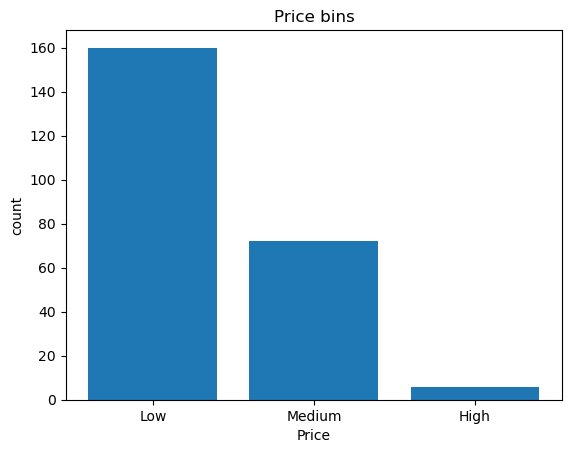

In [107]:
plt.bar(group_names, df["Price-binned"].value_counts())
plt.xlabel("Price")
plt.ylabel("count")
plt.title("Price bins")

# Task - 6

### Indicator variables
Convert the "Screen" attribute of the dataset into 2 indicator variables, "Screen-IPS_panel" and "Screen-Full_HD". Then drop the "Screen" attribute from the dataset.


In [108]:
df.Screen.value_counts()

Screen
Full HD      161
IPS Panel     77
Name: count, dtype: int64

In [109]:
dummies_data = pd.get_dummies(df.Screen)

In [ ]:
dummies_data.astype(int)

In [112]:
#Indicator Variable: Screen
dummy_variable_1 = pd.get_dummies(df["Screen"])
dummy_variable_1.rename(columns={'IPS Panel':'Screen-IPS_panel', 'Full HD':'Screen-Full_HD'}, inplace=True)
df = pd.concat([df, dummy_variable_1], axis=1)

# drop original column "Screen" from "df"
df.drop("Screen", axis = 1, inplace=True)

In [114]:
df.head()

,Manufacturer,Category,GPU,OS,CPU_core,Screen_Size_inch,CPU_frequency,RAM_GB,Storage_GB_SSD,Weight_pounds,Price,Price-binned,Screen-Full_HD,Screen-IPS_panel
0,Acer,4,2,1,5,14.0,0.551724,8,256,3.52800,978,Low,False,True
1,Dell,3,1,1,3,15.6,0.689655,4,256,4.85100,634,Low,True,False
2,Dell,3,1,1,7,15.6,0.931034,8,256,4.85100,946,Low,True,False
3,Dell,4,2,1,5,13.3,0.551724,8,128,2.69010,1244,Low,False,True
4,HP,4,2,1,7,15.6,0.620690,8,256,4.21155,837,Low,True,False
